In [1]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.4 MB/s eta 0:00:00


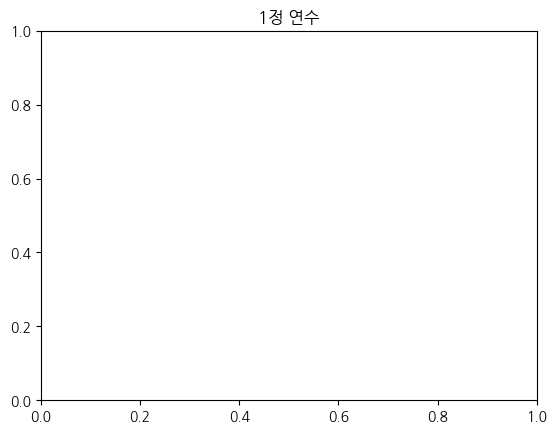

In [3]:
import matplotlib.pyplot as plt
plt.title("1정 연수")
plt.show()

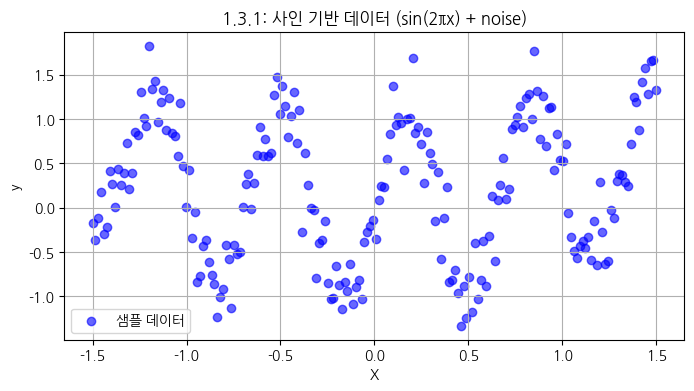

In [4]:
# 1.3.1: 사인 함수 기반 고차 다항 데이터 생성
import numpy as np

from sklearn.model_selection import train_test_split

# 복잡한 구조: sin + x^2 형태
np.random.seed(42)
X = np.linspace(-1.5, 1.5, 200).reshape(-1, 1)
y = np.sin(3 * np.pi * X).ravel() + 0.3 * X.ravel()**2 + 0.3 * np.random.randn(200)


# (훈련/테스트 분할 사용하지 않음)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', alpha=0.6, label='샘플 데이터')
plt.title("1.3.1: 사인 기반 데이터 (sin(2πx) + noise)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


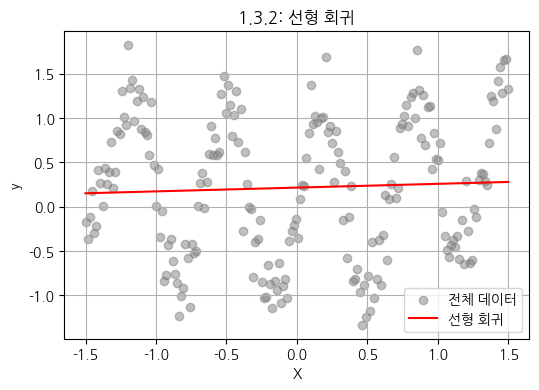

In [5]:
# 1.3.2: 선형 회귀
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 정렬된 X 값에 대해 예측
X_sorted = np.sort(X, axis=0)
y_lin = lin_reg.predict(X_sorted)

# 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='gray', alpha=0.5, label='전체 데이터')
plt.plot(X_sorted, y_lin, color='red', label='선형 회귀')
plt.title("1.3.2: 선형 회귀")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


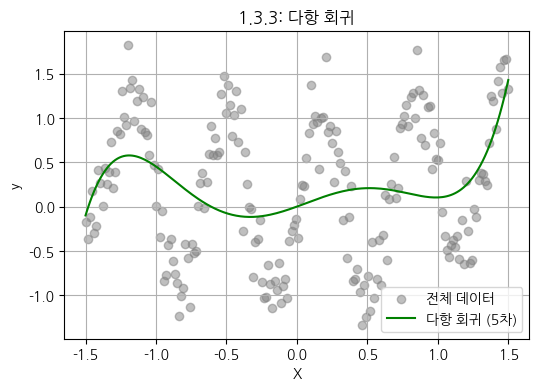

In [6]:
# 1.3.3: 다항 회귀 (5차)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
X_sorted_poly = poly.transform(X_sorted)

lin_poly = LinearRegression()
lin_poly.fit(X_poly, y)
y_poly = lin_poly.predict(X_sorted_poly)

# 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='gray', alpha=0.5, label='전체 데이터')
plt.plot(X_sorted, y_poly, color='green', label='다항 회귀 (5차)')
plt.title("1.3.3: 다항 회귀")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


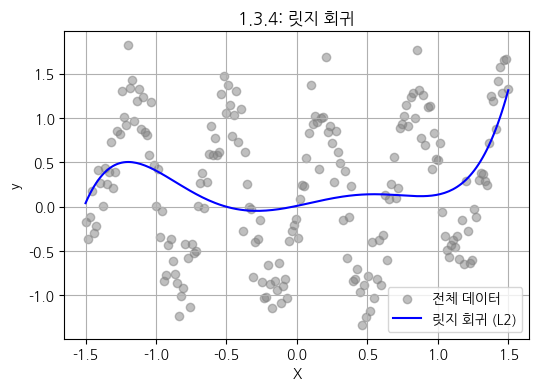

In [7]:
# 1.3.4: 릿지 회귀
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_poly, y)
y_ridge = ridge.predict(X_sorted_poly)

# 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='gray', alpha=0.5, label='전체 데이터')
plt.plot(X_sorted, y_ridge, color='blue', label='릿지 회귀 (L2)')
plt.title("1.3.4: 릿지 회귀")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


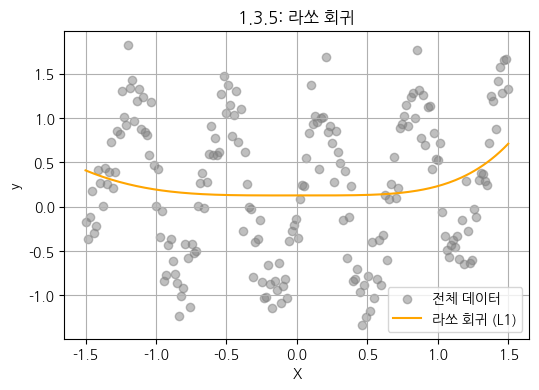

In [8]:
# 1.3.5: 라쏘 회귀
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_poly, y)
y_lasso = lasso.predict(X_sorted_poly)

# 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='gray', alpha=0.5, label='전체 데이터')
plt.plot(X_sorted, y_lasso, color='orange', label='라쏘 회귀 (L1)')
plt.title("1.3.5: 라쏘 회귀")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


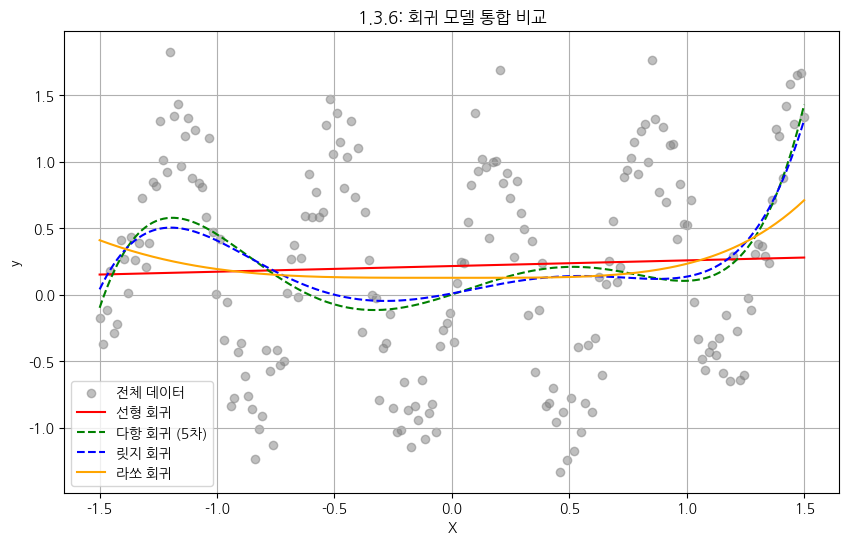

In [9]:
# 1.3.6: 네 가지 회귀 모델 통합 비교
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='전체 데이터')
plt.plot(X_sorted, y_lin, color='red', label='선형 회귀')
plt.plot(X_sorted, y_poly, color='green', linestyle='--', label='다항 회귀 (5차)')
plt.plot(X_sorted, y_ridge, color='blue', linestyle='--', label='릿지 회귀')
plt.plot(X_sorted, y_lasso, color='orange', linestyle='-', label='라쏘 회귀')
plt.title("1.3.6: 회귀 모델 통합 비교")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
#1.4.2

from sklearn.metrics import mean_squared_error, r2_score

# 네 가지 회귀 모델 평가
models = {
    "선형 회귀": (lin_reg, X),
    "다항 회귀": (lin_poly, X_poly),
    "릿지 회귀": (ridge, X_poly),
    "라쏘 회귀": (lasso, X_poly),
}

print("모델\t\t\tMSE\t\t\tR²")
print("-" * 50)
for name, (model, X_input) in models.items():
    y_pred = model.predict(X_input)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name:<10s}\t{mse:.4f}\t\t{r2:.4f}")


모델			MSE			R²
--------------------------------------------------
선형 회귀     	0.6133		0.0022
다항 회귀     	0.5405		0.1207
릿지 회귀     	0.5433		0.1162
라쏘 회귀     	0.5776		0.0603


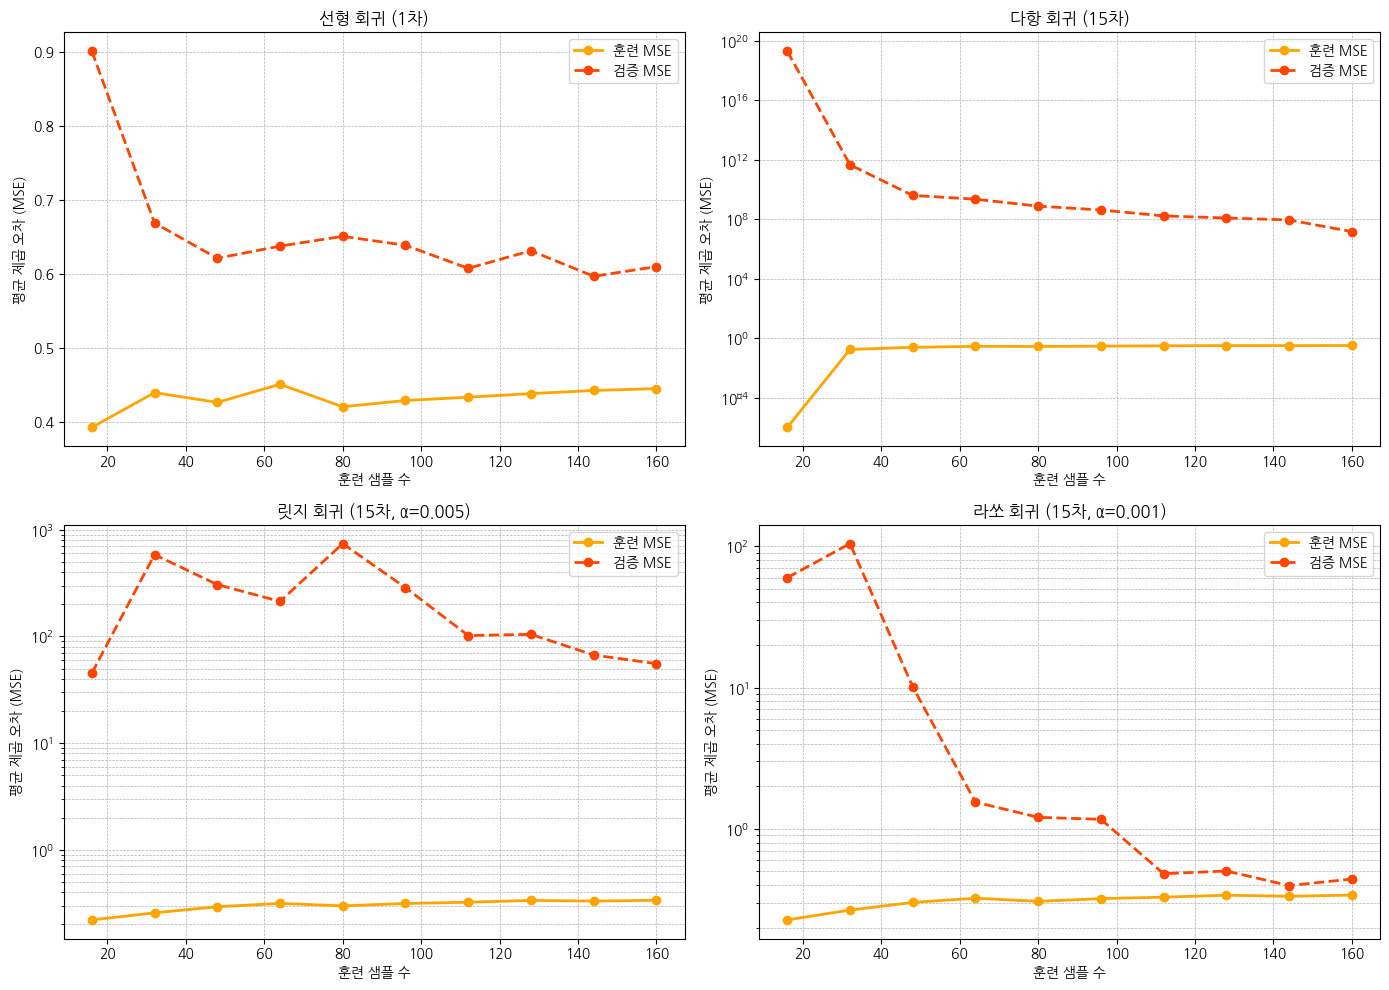

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import learning_curve

# 1. 데이터 생성 (복잡도  + 잡음 )
np.random.seed(42)
X = np.linspace(-1.5, 1.5, 200).reshape(-1, 1)
y = (
    0.3 * np.sin(9 * np.pi * X).ravel()   # 고주파수로 변경
    + 0.3 * X.ravel()**5                  # 곡선성
    + 0.6 * np.random.randn(200)          # 잡음
)

# 2. 모델 정의 (15차 다항)
lin_reg = LinearRegression()
poly15_lin = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
poly15_ridge = make_pipeline(
    PolynomialFeatures(degree=15),
    StandardScaler(),
    Ridge(alpha=0.005)
)

poly15_lasso = make_pipeline(
    PolynomialFeatures(degree=15),
    StandardScaler(),
    Lasso(alpha=0.001, max_iter=100000)
)

models = {
    "선형 회귀 (1차)": (lin_reg, X),
    "다항 회귀 (15차)": (poly15_lin, X),
    "릿지 회귀 (15차, α=0.005)": (poly15_ridge, X),
    "라쏘 회귀 (15차, α=0.001)": (poly15_lasso, X),
}

# 3. 학습 곡선 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, (name, (model, X_input)) in enumerate(models.items()):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_input, y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error',
        cv=5,
        shuffle=True,
        random_state=42
    )

    # 음수 제거 + log 스케일 호환성 확보
    epsilon = 1e-6
    train_errors = np.clip(-np.mean(train_scores, axis=1), epsilon, None)
    val_errors = np.clip(-np.mean(val_scores, axis=1), epsilon, None)

    ax = axes[idx]
    ax.plot(train_sizes, train_errors, 'o-', label="훈련 MSE", color='orange', linewidth=2)
    ax.plot(train_sizes, val_errors, 'o--', label="검증 MSE", color='orangered', linewidth=2)
    ax.set_title(f"{name}")
    ax.set_xlabel("훈련 샘플 수")
    ax.set_ylabel("평균 제곱 오차 (MSE)")

    # 조건부 로그 스케일 적용
    if "선형 회귀" not in name:
        ax.set_yscale("log")

    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig("learning_curve_poly15_mixed_scale.png")
plt.show()
